In [1]:
import numpy as np
from scipy import optimize, interpolate
from scipy.stats import multivariate_normal, gaussian_kde
import matplotlib
import matplotlib.pyplot as plt
plt.style.reload_library()
matplotlib.style.use('Minh_paper_style')
from matplotlib.ticker import (FixedLocator, MultipleLocator, FixedFormatter, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [12]:
filename='../data/SDSS_DR14_deltaL2_neff.txt'
delta,neff,CL=np.loadtxt(filename,unpack=True)
lya_grid=np.loadtxt(filename)

In [3]:
cov=np.cov(lya_grid[:,:2].T,aweights=CL)
lya_grid=lya_grid.reshape((30,30,3))
mean=lya_grid[np.where(lya_grid[:,:,2]==lya_grid[:,:,2].max())][0,:2]
gaussian_fit = multivariate_normal(mean=mean, cov=cov)

X,Y=np.meshgrid(lya_grid[:,0,0],lya_grid[0,:,1])
pos=np.dstack((X,Y))
Z=gaussian_fit.pdf(pos)
z=Z/Z.sum()

In [5]:
n = 30
t = np.linspace(0, z.max(), n)
integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))
f = interpolate.interp1d(integral, t,kind='linear')
t_contours = f(np.array([0.95, 0.68]))

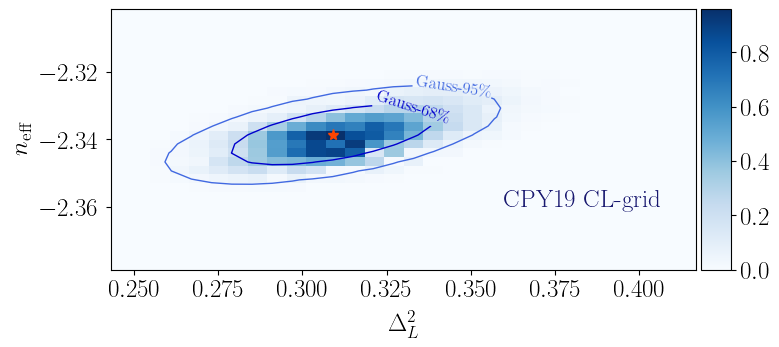

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

xmin=0.20
xmax=0.40
xstep=0.05
ymin=-2.40
ymax=-2.25
ystep=0.05

fig,ax=plt.subplots()
ax.plot(mean[0],mean[1],marker='*',c='orangered',markersize=8)
im=ax.imshow(lya_grid[:,:,2].T,origin='lower',extent=[lya_grid[:,:,0].min(),lya_grid[:,:,0].max(),lya_grid[:,:,1].min(),lya_grid[:,:,1].max()],cmap='Blues',label='Chabanier et al.');
contour_line_colors=['royalblue','mediumblue']
cs=ax.contour(lya_grid[:,0,0],lya_grid[0,:,1],z,levels=t_contours,colors=contour_line_colors)
fmt={}
labels = [r'Gauss-95\%',r'Gauss-68\%']
for l, s in zip(cs.levels, labels):
    fmt[l] = s
ax.clabel(cs,cs.levels,inline=1,fmt=fmt,fontsize=12,use_clabeltext=True)
for i in range(len(labels)):
    cs.collections[i].set_label(labels[i])
xticks=np.arange(xmin,xmax+xstep,xstep)
yticks=np.arange(ymin,ymax+ystep,ystep)
#ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)
#ax.set_xticks(xticks)
#ax.set_yticks(yticks)
ax.set_ylabel(r'$n_{\mathrm{eff}}$')
ax.set_xlabel(r'$\Delta^2_L$')
ax.annotate('CPY19 CL-grid',xy=(0.36,-2.36),xytext=(0.36,-2.36),color='midnightblue')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');
